In [4]:
# First we have to install command for mlxtent by using !pip install mlxtend

!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 495.5 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 819.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 2.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.6 MB/s eta 0:00:00


In [6]:
#Importing the required libraries for the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [9]:
# Read the data

df=pd.read_csv("book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [10]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [11]:
df.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [13]:
df.size

22000

In [15]:
df.shape

(2000, 11)

In [16]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

#  Preprocess is not required for the data because the data is in transaction format

#  Apriori Algorithm

#  Association rules with 10% Support and 40% confidence

In [25]:
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets



,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [26]:
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
84,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
85,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
86,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
87,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [27]:
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
81,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
86,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
52,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
...,...,...,...,...,...,...,...,...,...,...
63,(ChildBks),"(CookBks, GeogBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894,0.789141
61,(CookBks),"(GeogBks, ChildBks)",0.4310,0.1950,0.1495,0.346868,1.778809,0.065455,1.232522,0.769466
49,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749,0.791618
47,(CookBks),"(DoItYBks, ChildBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021,0.802850


In [28]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
84,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
85,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
86,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
87,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


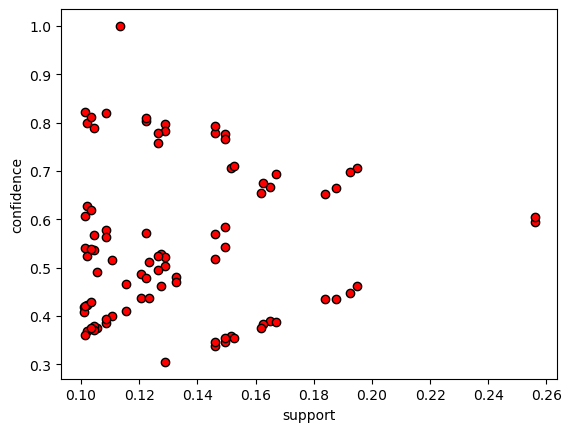

In [30]:
# Visualizing the obtained rule

plt.scatter(rules["support"],rules["confidence"],c="r",edgecolors="black")
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

# Association rules with 5% Support and 70% confidence

In [32]:
frequent_itemsets1=apriori(df,min_support=0.03,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
176,0.0535,"(ChildBks, DoItYBks, CookBks, GeogBks, ArtBks)"
177,0.0405,"(ChildBks, CookBks, GeogBks, RefBks, ArtBks)"
178,0.0300,"(ChildBks, CookBks, GeogBks, ItalCook, ArtBks)"
179,0.0370,"(YouthBks, DoItYBks, CookBks, GeogBks, ArtBks)"


In [33]:
rules1=association_rules(frequent_itemsets1,metric="confidence",min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
...,...,...,...,...,...,...,...,...,...,...
553,"(CookBks, DoItYBks, GeogBks, YouthBks)","(ChildBks, ArtBks)",0.0600,0.1625,0.0310,0.516667,3.179487,0.021250,1.732759,0.729238
554,"(CookBks, DoItYBks, ArtBks, YouthBks)","(GeogBks, ChildBks)",0.0525,0.1950,0.0310,0.590476,3.028083,0.020762,1.965698,0.706869
555,"(GeogBks, DoItYBks, ArtBks, YouthBks)","(CookBks, ChildBks)",0.0395,0.2560,0.0310,0.784810,3.065665,0.020888,3.457412,0.701516
556,"(CookBks, GeogBks, ArtBks, YouthBks)","(DoItYBks, ChildBks)",0.0560,0.1840,0.0310,0.553571,3.008540,0.020696,1.827840,0.707217


In [34]:
rules1.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
413,"(ItalCook, ArtBks)","(CookBks, ItalArt)",0.0565,0.0410,0.0375,0.663717,16.188215,0.035183,2.851763,0.994411
412,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429,0.978339
182,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
416,(ItalArt),"(CookBks, ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
179,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461,0.982434
...,...,...,...,...,...,...,...,...,...,...
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
9,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
150,"(Florence, ArtBks)",(CookBks),0.0485,0.4310,0.0315,0.649485,1.506925,0.010596,1.623324,0.353544
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [36]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
...,...,...,...,...,...,...,...,...,...,...
553,"(CookBks, DoItYBks, GeogBks, YouthBks)","(ChildBks, ArtBks)",0.0600,0.1625,0.0310,0.516667,3.179487,0.021250,1.732759,0.729238
554,"(CookBks, DoItYBks, ArtBks, YouthBks)","(GeogBks, ChildBks)",0.0525,0.1950,0.0310,0.590476,3.028083,0.020762,1.965698,0.706869
555,"(GeogBks, DoItYBks, ArtBks, YouthBks)","(CookBks, ChildBks)",0.0395,0.2560,0.0310,0.784810,3.065665,0.020888,3.457412,0.701516
556,"(CookBks, GeogBks, ArtBks, YouthBks)","(DoItYBks, ChildBks)",0.0560,0.1840,0.0310,0.553571,3.008540,0.020696,1.827840,0.707217


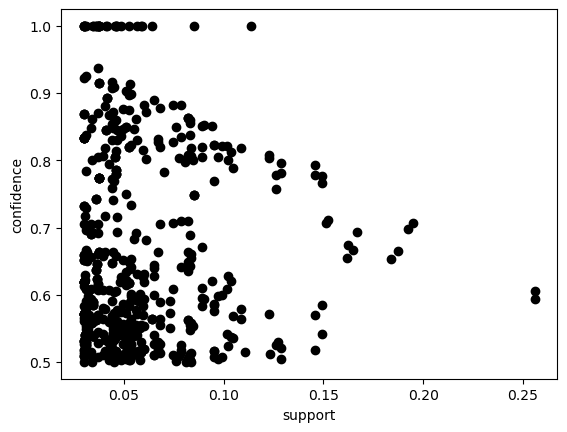

In [40]:
#Visulaization of obtained rule

plt.scatter(rules1["support"],rules1["confidence"],color="black")
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

#  Association rules with 2.5% Support and 85% confidence

In [46]:
frequent_itemsets2=apriori(df,min_support=0.025,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
217,0.0255,"(YouthBks, CookBks, GeogBks, RefBks, ArtBks)"
218,0.0275,"(DoItYBks, CookBks, GeogBks, RefBks, ArtBks)"
219,0.0250,"(DoItYBks, CookBks, ItalArt, ItalCook, ArtBks)"
220,0.0270,"(ChildBks, YouthBks, DoItYBks, CookBks, GeogBk..."


In [47]:
rules2=association_rules(frequent_itemsets2,metric="confidence",min_threshold=0.90)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf,0.815680
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf,0.797688
3,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf,0.621858
4,"(ChildBks, ItalAtlas)",(RefBks),0.0285,0.2145,0.0285,1.000000,4.662005,0.022387,inf,0.808543
...,...,...,...,...,...,...,...,...,...,...
74,"(CookBks, DoItYBks, ItalArt)","(ItalCook, ArtBks)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.73725,0.965036
75,"(DoItYBks, ItalCook, ItalArt)","(CookBks, ArtBks)",0.0250,0.1670,0.0250,1.000000,5.988024,0.020825,inf,0.854359
76,"(ChildBks, YouthBks, DoItYBks, GeogBks, RefBks)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.69000,0.537228
77,"(YouthBks, DoItYBks, CookBks, GeogBks, RefBks)",(ChildBks),0.0290,0.4230,0.0270,0.931034,2.201027,0.014733,8.36650,0.561964


In [48]:
rules2.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
68,"(CookBks, ChildBks, ItalArt)","(ItalCook, ArtBks)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000,0.969615
74,"(CookBks, DoItYBks, ItalArt)","(ItalCook, ArtBks)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250,0.965036
49,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429,0.978339
27,"(CookBks, ChildBks, ItalArt)",(ItalCook),0.0300,0.1135,0.0285,0.950000,8.370044,0.025095,17.730000,0.907759
66,"(CookBks, ArtBks, ChildBks, ItalArt)",(ItalCook),0.0300,0.1135,0.0285,0.950000,8.370044,0.025095,17.730000,0.907759
...,...,...,...,...,...,...,...,...,...,...
21,"(GeogBks, RefBks, YouthBks)",(ChildBks),0.0570,0.4230,0.0515,0.903509,2.135955,0.027389,5.979818,0.563972
53,"(GeogBks, DoItYBks, ChildBks, YouthBks)",(CookBks),0.0565,0.4310,0.0510,0.902655,2.094327,0.026648,5.845182,0.553810
8,"(DoItYBks, ItalArt)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.690000,0.537228
38,"(DoItYBks, ItalArt, ArtBks)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.690000,0.537228


In [49]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf,0.815680
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf,0.797688
3,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf,0.621858
4,"(ChildBks, ItalAtlas)",(RefBks),0.0285,0.2145,0.0285,1.000000,4.662005,0.022387,inf,0.808543
...,...,...,...,...,...,...,...,...,...,...
74,"(CookBks, DoItYBks, ItalArt)","(ItalCook, ArtBks)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.73725,0.965036
75,"(DoItYBks, ItalCook, ItalArt)","(CookBks, ArtBks)",0.0250,0.1670,0.0250,1.000000,5.988024,0.020825,inf,0.854359
76,"(ChildBks, YouthBks, DoItYBks, GeogBks, RefBks)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.69000,0.537228
77,"(YouthBks, DoItYBks, CookBks, GeogBks, RefBks)",(ChildBks),0.0290,0.4230,0.0270,0.931034,2.201027,0.014733,8.36650,0.561964


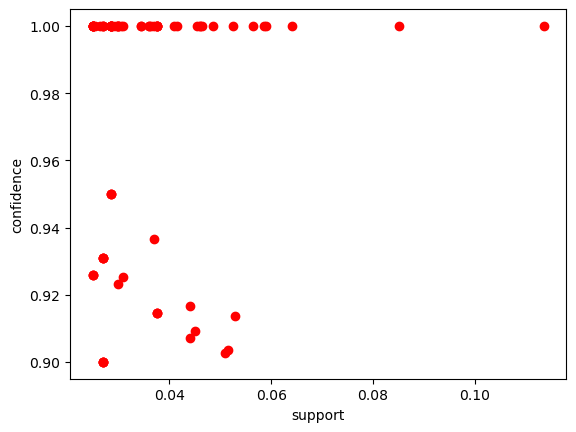

In [57]:
#Visualization for obtained rules

plt.scatter(rules2["support"],rules2["confidence"],color="red")
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()
